In [25]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [26]:
#locale.currency( g, grouping = True )

In [27]:
from numpy.random import randn
#np.random.seed(101)

In [37]:
# Abre o dataset
df = pd.read_csv('C:/Mettricx/Projetos/SFoods/dataset/NFe-SupraS.csv', dtype={'cod': object, 'NF': object, 'CNPJ': object})


In [38]:
df.head()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,QTY,preco,descricao,Familia,unidade
0,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,020002,1,2.77,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
1,TOP GREEN FRUIT HORTIFRUITGRANJEIROS LTDA,1275,2014-10-04,09642314000162,ARARUAMA,CENTRO,RJ,020002,24,66.48,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
2,M L ZIELINSKI LANCHONETE E CONVENIENCIA,1285,2014-10-09,20815576000114,MACAE,SOL E MAR,RJ,020002,2,5.54,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
3,NOVA ESPERANCA DE ARARUAMA LTDA EPP,1294,2014-10-14,05054332000172,ARARUAMA,MATARUNA,RJ,020002,18,49.86,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
4,SUPERMERCADO SAO JUDAS TADEU LTDA,1296,2014-10-14,09653290000147,SAQUAREMA,BACAXA,RJ,020002,12,33.24,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN


#### Total revenues


In [41]:
FaturamentoTotal=df['preco'].sum()


In [42]:
FaturamentoTotal

11498904.42

#### The total number of Invoice Issued in the Period

In [47]:
NotasFiscais = df['NF']

In [48]:
NotasFiscais = NotasFiscais.drop_duplicates()

In [49]:
TotalNFEmitidas = len(NotasFiscais)

In [50]:
TotalNFEmitidas 

6599

#### Monthly Sales

In [51]:
Vendas = df[['data','preco']].groupby(df['data'].str[0:7]).sum().reset_index()

In [52]:
Vendas.head()

,data,preco
0,2014-08,25.15
1,2014-09,30112.97
2,2014-10,163876.63
3,2014-11,198276.21
4,2014-12,259088.05


#### Annual sales

In [53]:
V18 = Vendas[(Vendas['data'].str[0:4]=='2018')].reset_index(drop=True)

In [54]:
V17 = Vendas[(Vendas['data'].str[0:4]=='2017')].reset_index(drop=True)

In [55]:
V16 = Vendas[(Vendas['data'].str[0:4]=='2016')].reset_index(drop=True)

In [56]:
V15 = Vendas[(Vendas['data'].str[0:4]=='2015')].reset_index(drop=True)

In [57]:
V14 = Vendas[(Vendas['data'].str[0:4]=='2014')].reset_index(drop=True)


In [58]:
V14 = V14.append({'data':'2014-01','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-02','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-03','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-04','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-05','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-06','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-07','preco':0}, ignore_index=True)



In [59]:
V14 = V14.sort_values(by=['data']).reset_index(drop=True)

In [60]:
V14.tail()

,data,preco
7,2014-08,25.15
8,2014-09,30112.97
9,2014-10,163876.63
10,2014-11,198276.21
11,2014-12,259088.05


In [61]:
sales = [('Mês',['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']),
         ('2014',V14['preco']),
         ('2015',V15['preco']),
         ('2016',V16['preco']),
         ('2017',V17['preco']),
         ('2018',V18['preco']),]

In [62]:
sales_DF = pd.DataFrame.from_items(sales)

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [63]:
sales_DF

,Mês,2014,2015,2016,2017,2018
0,Jan,0.00,165103.99,212640.71,216609.02,434700.26
1,Fev,0.00,185945.33,227344.29,409148.10,240627.65
2,Mar,0.00,229709.88,280651.12,357668.28,NaN
3,Abr,0.00,121420.28,264199.83,324977.92,NaN
4,Mai,0.00,157696.96,194735.60,402651.44,NaN
5,Jun,0.00,159112.07,254453.45,354314.36,NaN
6,Jul,0.00,223929.86,206424.09,349051.92,NaN
7,Ago,25.15,170528.37,294932.95,351108.02,NaN
8,Set,30112.97,209098.41,325393.38,349613.55,NaN
9,Out,163876.63,214789.59,260085.15,330428.60,NaN


#### Create CSV File

In [100]:
sales_DF.to_csv('C:/Mettricx/Projetos/SFoods/dataset/SFoods_Vendas_Anuais.csv', encoding='utf-8', index=False,  float_format='%.2f')

####  Purchases  per customer

In [70]:
compraDeClientes = df.groupby('CNPJ')['preco'].sum().reset_index()

In [71]:
compraDeClientes.rename(columns={'preco': 'TotCompras'}, inplace=True)

In [72]:
compraDeClientes.head()

,CNPJ,TotCompras
0,00175479000105,14418.13
1,00334392000206,1511.64
2,00381613000116,6249.46
3,00803210000118,10971.35
4,00814123000166,8412.20


#### Sort by the amount of purchase

In [73]:
compras = compraDeClientes.sort_values(by=['TotCompras'],ascending=False, na_position='first').reset_index(drop=True)

In [74]:
compras.head()

,CNPJ,TotCompras
0,12360891000176,474946.97
1,15116388000168,367559.08
2,12434859000198,350649.19
3,29840154000173,298708.56
4,19068286000175,281812.84


#### Define purchasing volume, in Reals, per Customer (Total Volume Share)

In [75]:
compras['percenTotal']=((compras['TotCompras']/FaturamentoTotal)*100).round(3)

In [76]:
compras.head()

,CNPJ,TotCompras,percenTotal
0,12360891000176,474946.97,4.130
1,15116388000168,367559.08,3.196
2,12434859000198,350649.19,3.049
3,29840154000173,298708.56,2.598
4,19068286000175,281812.84,2.451


#### Value of each Invoice issued

In [77]:
ValorNF = df.groupby('NF')["preco"].sum().rename("Total_NF").reset_index()

In [78]:
ValorNF.head()

,NF,Total_NF
0,10,1.47
1,12,316.41
2,1241,1401.01
3,1242,1189.96
4,1243,1093.39


#### Number of Purchases made by each Client in the Analyzed period. (Invoices Issued to the Customer)

In [79]:
df1 = df[['CNPJ','NF']]  

In [80]:
df1 = df1.drop_duplicates()

In [81]:
df1.head()

,CNPJ,NF
0,27833615002018,4
1,09642314000162,1275
2,20815576000114,1285
3,05054332000172,1294
4,09653290000147,1296


In [82]:
qtyDeCompras = df1.groupby('CNPJ').agg({'NF': "count"}).reset_index()   

In [83]:
qtyDeCompras.rename(columns={'NF': 'NumCompras'}, inplace=True)

In [84]:
qtyDeCompras.head()

,CNPJ,NumCompras
0,00175479000105,16
1,00334392000206,2
2,00381613000116,8
3,00803210000118,10
4,00814123000166,4


#### Number of Invoice issued

In [86]:
a=qtyDeCompras['NumCompras'].sum()
a

6599

In [87]:
qtyDeCompras = qtyDeCompras.sort_values(by=['NumCompras'],ascending=False, na_position='first').reset_index(drop=True)

In [88]:
qtyDeCompras.head()

,CNPJ,NumCompras
0,17339293000139,141
1,12434859000198,134
2,22536813000133,114
3,29840154000173,72
4,19068286000175,68


#### Percentage of Purchase of each Customer

In [89]:
qtyDeCompras['Percentual']=((qtyDeCompras['NumCompras']/TotalNFEmitidas)*100).round(3)

In [90]:
qtyDeCompras = qtyDeCompras.sort_values(by=['Percentual'],ascending=False, na_position='first').reset_index(drop=True)

In [91]:
qtyDeCompras.head()

,CNPJ,NumCompras,Percentual
0,17339293000139,141,2.137
1,12434859000198,134,2.031
2,22536813000133,114,1.728
3,29840154000173,72,1.091
4,19068286000175,68,1.030


In [92]:
# Faz o MERGE dos dois Datasets
s1 = pd.merge(compras, qtyDeCompras, how='inner', on=['CNPJ'])

In [93]:
s1.head()

,CNPJ,TotCompras,percenTotal,NumCompras,Percentual
0,12360891000176,474946.97,4.130,26,0.394
1,15116388000168,367559.08,3.196,23,0.349
2,12434859000198,350649.19,3.049,134,2.031
3,29840154000173,298708.56,2.598,72,1.091
4,19068286000175,281812.84,2.451,68,1.030


In [99]:
s1.to_csv('C:/Mettricx/Projetos/SFoods/dataset/SFoods_Clientes_Classificacao.csv', encoding='utf-8', index=False,  float_format='%.3f')

In [95]:
s1['TotCompras'].sum()

11498904.419999992

In [96]:
s1 = s1.sort_values(by=['percenTotal'],ascending=False, na_position='first').reset_index(drop=True)

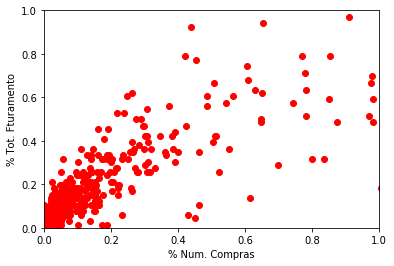

In [98]:
import matplotlib.pyplot as plt
plt.plot(s1.percenTotal, s1.Percentual, 'ro')
plt.axis([0, 1, 0, 1])
plt.xlabel('% Num. Compras')
plt.ylabel('% Tot. Fturamento')

plt.show()

#### Clientes Top (> 1% do Faturamento)

In [79]:
#ClientesTop = s1[['CNPJ','TotCompras','percenTotal','NumCompras','Percentual']]
clientesTop = s1[s1['percenTotal'] >= 1][['CNPJ','TotCompras','percenTotal','NumCompras','Percentual']]

In [102]:
clientesTop.head()

,CNPJ,TotCompras,percenTotal,NumCompras,Percentual
0,12360891000176,474946.97,4.067,26,0.392
1,15116388000168,367559.08,3.148,23,0.347
2,12434859000198,362693.84,3.106,136,2.052
3,29840154000173,300708.01,2.575,72,1.086
4,19068286000175,287622.97,2.463,69,1.041


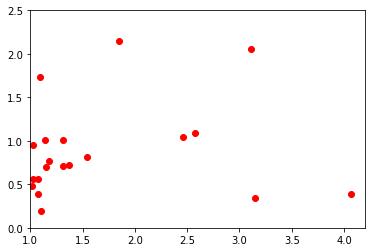

In [101]:
import matplotlib.pyplot as plt
plt.plot(clientesTop.percenTotal, clientesTop.Percentual, 'ro')
plt.axis([1, 4.2, 0, 2.5])

plt.show()

#### Customers purchasing per month

In [101]:
dados = df[['data','NF']].groupby(['data','NF']).size().reset_index(name='Produtos')

In [102]:
dados = df[['data','CNPJ']].groupby(['data','CNPJ']).size().reset_index(name='Produtos')

In [103]:
#dados = df.groupby([df['data'].str[0:7],df['CNPJ']]).size()
dados = df.groupby('data').agg({'CNPJ': "count"}).reset_index()   

In [104]:
dados = df.groupby('data').agg({'CNPJ': "count"}).reset_index()   

In [105]:
dados = df[['data','CNPJ']]

In [106]:
dados = dados.drop_duplicates().reset_index(drop=True)   

In [107]:
dados['data'] = dados['data'].str[0:7]

In [108]:
dados.head()

,data,CNPJ
0,2014-08,27833615002018
1,2014-10,09642314000162
2,2014-10,20815576000114
3,2014-10,05054332000172
4,2014-10,09653290000147


#### Grouping total Customer per month

In [112]:
dados1 = dados.groupby('data').agg({'CNPJ': "count"}).reset_index()  

#### Converting the column to Date pattern

In [113]:
dados1['data'] = pd.to_datetime(dados1['data'], format='%Y-%m'  )

In [114]:
dados1.set_index('data', inplace=True)

In [115]:
dados1.head()

,CNPJ
data,
2014-08-01,2
2014-09-01,18
2014-10-01,91
2014-11-01,93
2014-12-01,97


#### Defines the evolution of the number of customers per month

Text(0,0.5,'Num. Clientes')

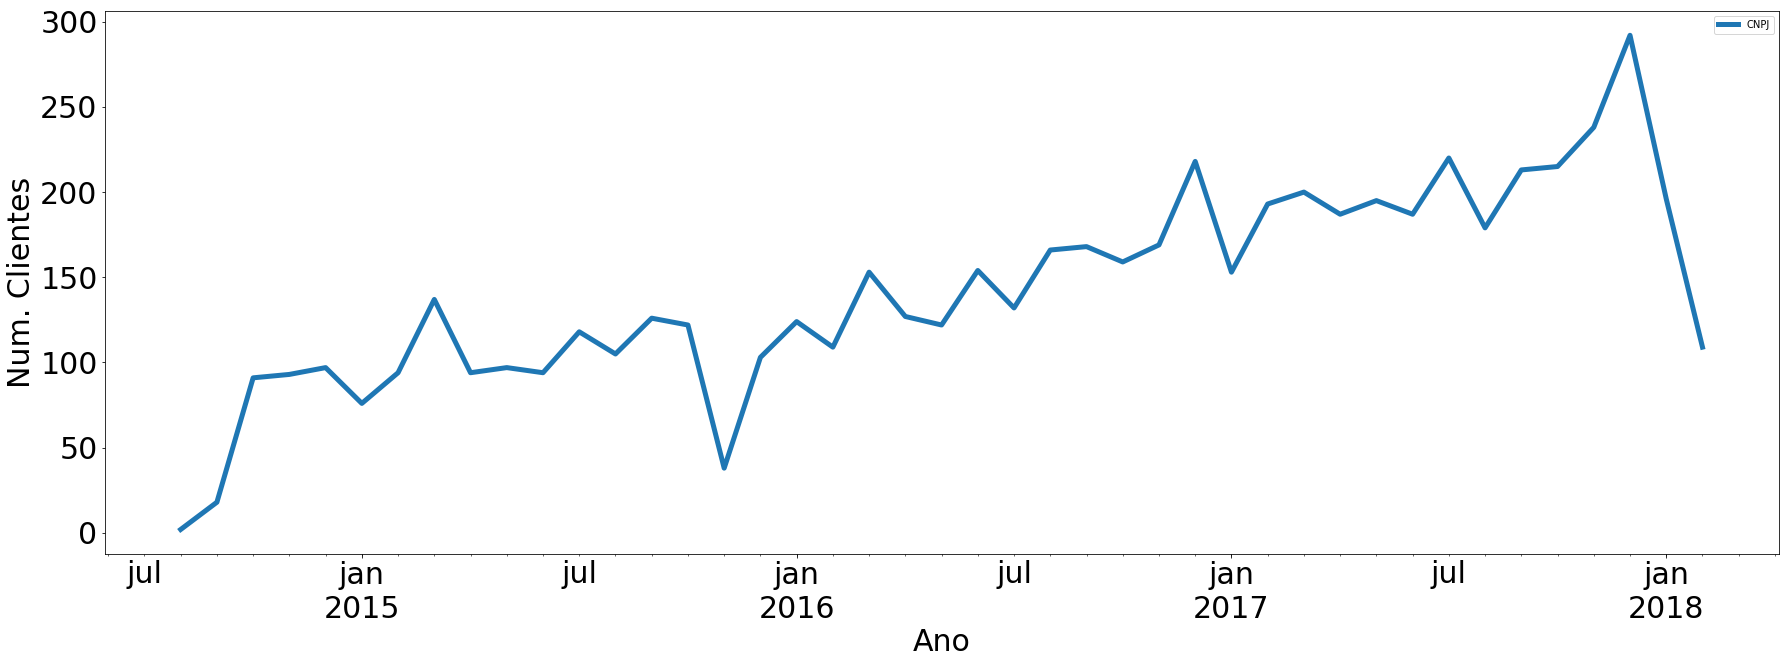

In [116]:
dados1.plot(figsize=(30,10), linewidth=5, fontsize=30)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Num. Clientes', fontsize=30)

In [177]:
# Convertendo de Série p/ dataframe
#d = dados.to_frame().reset_index()


In [ ]:
# Número de Clientes por Mês
numClientes = d.groupby('data').size()
numClientes.head()

In [ ]:
# Número médio de Clientes
a=(numClientes.mean())

In [ ]:
int(a)

In [ ]:
numC = numClientes.plot( x=numClientes, stacked=True, kind='bar', figsize=(20,7), rot=90, legend=False, facecolor='#AA0000')

numC.set_xlabel('Mês')
numC.set_ylabel('Número de Clientes')
numC.set_title('Clientes Ativos')
numC.axhline( y=a, color='g', linestyle='--', lw=2, label='Valor Médio')